# Homework 1
- author: Aleksandra Kocot
 - [Git Hub page with the Homework questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/01-intro/homework.md)

## Question 1
What's the version of Pandas that you installed?

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
pd.__version__

'2.1.0'

### Getting the data

In [164]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-13 16:04:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  --.-KB/s    in 0,1s    

2023-09-13 16:04:46 (9,25 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
! ls

Homework1.ipynb  housing.csv  README.md  Week1.ipynb


##### Before reading into Python let's check how the file look like
- data seems to be consistnet
- it is comma delimited

In [168]:
! head housing.csv

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [169]:
! tail housing.csv

-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
-121.4,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.125,115600.0,INLAND
-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


#### How many lines is there in this file?

In [172]:
! wc -l housing.csv

20641 housing.csv


In [5]:
data = pd.read_csv("housing.csv")

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.shape

(20640, 10)

##### Number of rows is 20640 - so with columns names it is 20641 as above.

### Now let's check data type
- all the columns but one are floats numbers
- the last column "ocean_proximity" is an object (here we saw it is actually a String)

In [154]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Question 2
How many columns are in the dataset?

In [118]:
len(data.columns)

10

## Question 3
Which columns in the dataset have missing values?

In [121]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [131]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [132]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Answer: All three methods show that it is only "total_bedrooms" that contains null values.
Although we don't know if some values are incorrect and can be still consider as missing. Like 0 rooms, may indicate a missing value.

## Question 4
How many unique values does the ocean_proximity column have?

In [179]:
data.ocean_proximity.nunique()

5

In [181]:
list(data.ocean_proximity.unique())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

## Question 5
What's the average value of the median_house_value for the houses located near the bay?

In [142]:
data.loc[data.ocean_proximity=="NEAR BAY"]['median_house_value'].mean()

259212.31179039303

In [143]:
data.groupby("ocean_proximity")['median_house_value'].mean()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

## Question 6
Calculate the average of total_bedrooms column in the dataset.

Use the fillna method to fill the missing values in total_bedrooms with the mean value from the previous step.

Now, calculate the average of total_bedrooms again.

Has it changed?

Has it changed?

Hint: take into account only 3 digits after the decimal point.

In [9]:
data["total_bedrooms"].mean()

537.8705525375618

In [10]:
data["total_bedrooms"].isna().sum()

207

In [129]:
data["total_bedrooms"][data["total_bedrooms"].isna()] = data["total_bedrooms"].mean()

In [14]:
data["total_bedrooms"].isna().sum()

0

In [15]:
data["total_bedrooms"].mean()

537.8705525375617

Answer: No change in the average value.

## Question 7
Select all the options located on islands.<br>
Select only columns housing_median_age, total_rooms, total_bedrooms.<br>
Get the underlying NumPy array. Let's call it X.<br>
Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.<br>
Compute the inverse of XTX.<br>
Create an array y with values [950, 1300, 800, 1000, 1300].<br>
Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.<br><br>
What's the value of the last element of w?<br>
Note: You just implemented linear regression. We'll talk about it in the next lesson.

In [18]:
data.loc[data.ocean_proximity=="ISLAND"][["housing_median_age", "total_rooms", "total_bedrooms"]]

,housing_median_age,total_rooms,total_bedrooms
8314,27.0,1675.0,521.0
8315,52.0,2359.0,591.0
8316,52.0,2127.0,512.0
8317,52.0,996.0,264.0
8318,29.0,716.0,214.0


In [23]:
X = data.loc[data.ocean_proximity=="ISLAND"][["housing_median_age", "total_rooms", "total_bedrooms"]].values

In [24]:
X

array([[  27., 1675.,  521.],
       [  52., 2359.,  591.],
       [  52., 2127.,  512.],
       [  52.,  996.,  264.],
       [  29.,  716.,  214.]])

In [26]:
np.transpose(X)

array([[  27.,   52.,   52.,   52.,   29.],
       [1675., 2359., 2127.,  996.,  716.],
       [ 521.,  591.,  512.,  264.,  214.]])

In [54]:
XTX = np.matmul(np.transpose(X),X)

In [55]:
XTX

array([[9.6820000e+03, 3.5105300e+05, 9.1357000e+04],
       [3.5105300e+05, 1.4399307e+07, 3.7720360e+06],
       [9.1357000e+04, 3.7720360e+06, 9.9835800e+05]])

In [56]:
XTXinv = np.linalg.inv(XTX)

In [57]:
XTXinv

array([[ 9.19403586e-04, -3.66412216e-05,  5.43072261e-05],
       [-3.66412216e-05,  8.23303633e-06, -2.77534485e-05],
       [ 5.43072261e-05, -2.77534485e-05,  1.00891325e-04]])

In [79]:
y = np.array([950, 1300, 800, 1000, 1300])

In [80]:
y

array([ 950, 1300,  800, 1000, 1300])

In [81]:
XTXinvXT = np.matmul(XTXinv,np.transpose(X))

In [82]:
XTXinvXT

array([[-0.00825608, -0.00653208, -0.00232159,  0.02565144,  0.01204934],
       [-0.00165852,  0.0011141 ,  0.00139656, -0.00103215, -0.00110698],
       [ 0.00754365, -0.00301964, -0.00455125,  0.00181685,  0.00329418]])

In [87]:
w = XTXinvXT.dot(y)

In [88]:
w

array([23.12330961, -1.48124183,  5.69922946])

## Appendix

##### What we have calculated above are least squares estimates of linear rgerssion model parameters.
Are those good approximation?
- In this model we didn't add intercept so we assume that the line comes through (0,0) point.
- We would get better estiamtes when adding intercept to the model.

### Linear model without intercept (scatterplot for "housing_median_age")

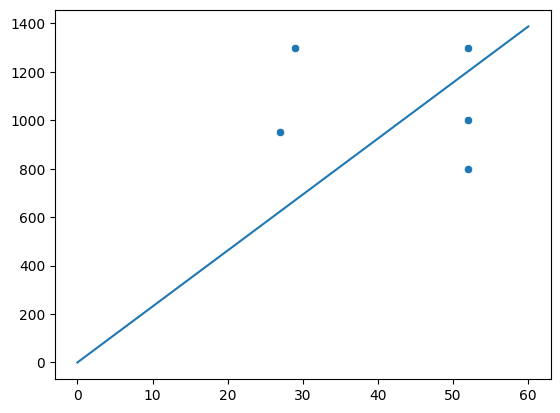

In [102]:
sns.scatterplot(x=data.loc[data.ocean_proximity=="ISLAND"]["housing_median_age"].values, y=y);
plt.plot([0,60],[0,60*23.12330961]);

### Linear model with intercept (scatterplot for "housing_median_age")

In [121]:
X

array([[  27., 1675.,  521.],
       [  52., 2359.,  591.],
       [  52., 2127.,  512.],
       [  52.,  996.,  264.],
       [  29.,  716.,  214.]])

In [122]:
z = np.ones((5,1))

In [123]:
X_ = np.append(X, z, axis=1)

In [124]:
X_

array([[2.700e+01, 1.675e+03, 5.210e+02, 1.000e+00],
       [5.200e+01, 2.359e+03, 5.910e+02, 1.000e+00],
       [5.200e+01, 2.127e+03, 5.120e+02, 1.000e+00],
       [5.200e+01, 9.960e+02, 2.640e+02, 1.000e+00],
       [2.900e+01, 7.160e+02, 2.140e+02, 1.000e+00]])

In [125]:
XTXinv_ = np.linalg.inv(np.matmul(np.transpose(X_),X_))

In [126]:
XTXinv_

array([[ 6.15016112e-03, -3.63577408e-04,  1.34574992e-03,
        -2.54031109e-01],
       [-3.63577408e-04,  2.86674131e-05, -1.08472034e-04,
         1.58776165e-02],
       [ 1.34574992e-03, -1.08472034e-04,  4.19740787e-04,
        -6.27187587e-02],
       [-2.54031109e-01,  1.58776165e-02, -6.27187587e-02,
         1.23369902e+01]])

In [127]:
np.matmul(XTXinv_,np.transpose(X_)).dot(y)

array([-9.87405985e+00,  5.81181074e-01, -2.44762334e+00,  1.60251327e+03])

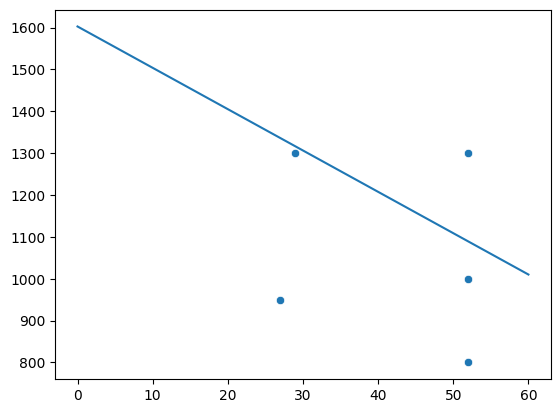

In [128]:
sns.scatterplot(x=data.loc[data.ocean_proximity=="ISLAND"]["housing_median_age"].values, y=y);
plt.plot([0,60],[1602.51327,1602.51327-60*9.87405985]);